# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import datetime
import os
import csv
from os import open




# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

api_key = "f67e3fa7c38ade3e32c5e390595ffd07"
record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print("Beginning Data Retrieval")
print("------------------------")

#get weather data
for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')
    

Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | along
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 2 of set 0 | coari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 3 of set 0 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 4 of set 0 | koga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 5 of set 0 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 6 of set 0 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 7 of set 0 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c3

Processing record 7 of set 1 | kegayli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
City not found!
Processing record 8 of set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 9 of set 1 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
City not found!
Processing record 10 of set 1 | petersburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 11 of set 1 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 12 of set 1 | atocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 13 of set 1 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3

Processing record 14 of set 2 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
City not found!
Processing record 15 of set 2 | roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 16 of set 2 | gigmoto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 17 of set 2 | mentok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
City not found!
Processing record 18 of set 2 | ust-kut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 19 of set 2 | luau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 20 of set 2 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e3

Processing record 21 of set 3 | khonuu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
City not found!
Processing record 22 of set 3 | usinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 23 of set 3 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 24 of set 3 | chegdomyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 25 of set 3 | haukipudas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 26 of set 3 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 27 of set 3 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595

Processing record 28 of set 4 | sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 29 of set 4 | markova
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 30 of set 4 | bay city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 31 of set 4 | bontang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 32 of set 4 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
City not found!
Processing record 33 of set 4 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
City not found!
Processing record 34 of set 4 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38

Processing record 34 of set 5 | ozgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
City not found!
Processing record 35 of set 5 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 36 of set 5 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 37 of set 5 | san borja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 38 of set 5 | caraquet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 39 of set 5 | parrita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 40 of set 5 | merrill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595

Processing record 40 of set 6 | kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 41 of set 6 | darhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 42 of set 6 | altamont
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 43 of set 6 | olhao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 44 of set 6 | meyungs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
City not found!
Processing record 45 of set 6 | hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 46 of set 6 | albion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07

Processing record 46 of set 7 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 47 of set 7 | nchelenge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 48 of set 7 | kimbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 49 of set 7 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 50 of set 7 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 0 of set 8 | jining
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 1 of set 8 | nizhneangarsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processin

Processing record 2 of set 9 | chatham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 3 of set 9 | gawler
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 4 of set 9 | fort saint james
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 5 of set 9 | chubbuck
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 6 of set 9 | sile
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 7 of set 9 | pechenga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 8 of set 9 | abu samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing

Processing record 8 of set 10 | marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 9 of set 10 | myitkyina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 10 of set 10 | yenagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 11 of set 10 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 12 of set 10 | beni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 13 of set 10 | vila do maio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 14 of set 10 | altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Pr

Processing record 14 of set 11 | monforte de lemos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 15 of set 11 | sardarpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 16 of set 11 | puerto carreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 17 of set 11 | cape canaveral
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 18 of set 11 | zhenlai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 19 of set 11 | xichang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ade3e32c5e390595ffd07
Processing record 20 of set 11 | chudniv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f67e3fa7c38ad

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#create a df from cities, cloudiness, country, date, humidity, lat, lng.
# max temp, Wind Speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
     }
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Temp          540
Lat           540
Lng           540
Wind Speed    540
dtype: int64

In [ ]:
weather_data.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

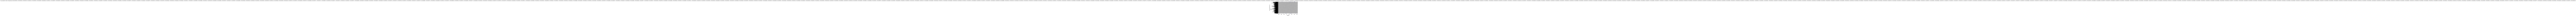

In [12]:
#plot scatter plot 
plt.scatter(weather_data["Lat"], weather_data["City"], color= "blue", edgecolors = "k", s = 50)
    
# plt.scatter(weather_data["Lat"], weather_data, marker="o", 
#             facecolors="red", edgecolors="black",
#            s = 50, alpha=0.75)

#plot title and axis labels
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()

#save the figure
plt.savefig("../Images/LatitudeVsTemperature.png")



#### Latitude vs. Temperature Plot

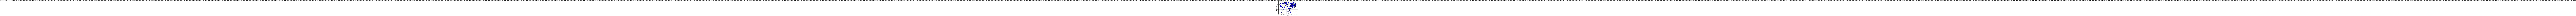

In [15]:
#plot scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Temp"], color= "blue", edgecolors = "k", s = 50)


#plot title and axis labels
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()

#save the figure
plt.savefig("../Images/LatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

In [ ]:
#plot scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color= "blue", edgecolors = "k", s = 50)


#plot title and axis labels
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()

#save the figure
plt.savefig("../Images/LatitudeVsTemperature.png")

#### Latitude vs. Cloudiness Plot

In [ ]:
#plot scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color= "blue", edgecolors = "k", s = 50)


#plot title and axis labels
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()

#save the figure
plt.savefig("../Images/LatitudeVsTemperature.png")

#### Latitude vs. Wind Speed Plot

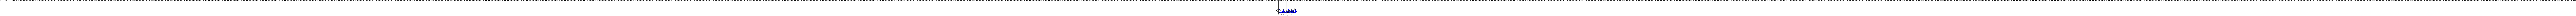

In [16]:
#plot scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color= "blue", edgecolors = "k", s = 50)


#plot title and axis labels
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()

#save the figure
plt.savefig("../Images/LatitudeVsTemperature.png")